# Dataset Cleaning & Exploration
Erin Cameron  
COSC3117  
2022-11-14 
---



# 1.0) Set up

In [239]:
# !pip3 install seaborn

In [240]:
# Perform import statements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [85]:
# Formatting settings for the environment
pd.set_option("display.max_columns", None)
np.set_printoptions(suppress=True)

# 2.0) Load & format data

Load data for each year of flight record & combine into a single file for downstream exploration and analysis. Each of the years between 2018 to 2022 contain upwards of 5 million flights (rows) each. Combining data of this size quickly becomes unmanageable (~30mil rows) & too large too work with in local memory. To overcome this, I will randomly subsample each year to a subset of 1 million flights. Furthermore, by making each dataset the same size, each year will carry equal weight (be represented equally) in downstream analyses & predictions.

In [4]:
# define years I want to use data for
years = ["2018", "2019", "2020", "2021", "2022"]

In [6]:
# read in data, add to dictionary, and remove obj from memory
# if the file contains >1million flights, randomly subsample to 1 million flights (rows)
data_dict = {}
for year in years:
    print("\n====> " + year)
    data = pd.read_csv("../data/Kaggle_Data/Combined_Flights_" + year + ".csv")    
    print("      Original dataset size...." + str(data.shape))
    if data.shape[0] > 1000000:
        data = data.sample(n=1000000)
        print("      Randomly subsampling to 1mil flights...." + str(data.shape))
        data_dict[year] = data
    del data


====> 2018
      Original dataset size....(5689512, 61)
      Randomly subsampling to 1mil flights....(1000000, 61)

====> 2019
      Original dataset size....(8091684, 61)
      Randomly subsampling to 1mil flights....(1000000, 61)

====> 2020
      Original dataset size....(5022397, 61)
      Randomly subsampling to 1mil flights....(1000000, 61)

====> 2021
      Original dataset size....(6311871, 61)
      Randomly subsampling to 1mil flights....(1000000, 61)

====> 2022
      Original dataset size....(4078318, 61)
      Randomly subsampling to 1mil flights....(1000000, 61)


In [7]:
# Combine data across years into one data frame
merged = pd.concat(data_dict.values(), ignore_index = True)

In [8]:
# Check that the merge was sucessful
print("====> New, merged dataset size is...." + str(merged.shape))
display(merged.head(3))
display(merged.tail(3))

====> New, merged dataset size is....(5000000, 61)


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2018-07-10,Southwest Airlines Co.,BWI,MHT,False,False,1935,2000.0,25.0,25.0,2119.0,19.0,60.0,85.0,79.0,377.0,2018,3,7,10,2,WN,WN,19393,WN,2362,WN,19393,WN,N743SW,2362,10821,1082106,30852,"Baltimore, MD",MD,24,Maryland,35,13296,1329604,30721,"Manchester, NH",NH,33,New Hampshire,14,1.0,1.0,1900-1959,16.0,2016.0,2116.0,3.0,2100,19.0,1.0,1.0,2100-2159,2,0.0
1,2018-04-05,Southwest Airlines Co.,ROC,MCO,False,False,940,950.0,10.0,10.0,1244.0,19.0,143.0,165.0,174.0,1033.0,2018,2,4,5,4,WN,WN,19393,WN,1947,WN,19393,WN,N8514F,1947,14576,1457606,34576,"Rochester, NY",NY,36,New York,22,13204,1320402,31454,"Orlando, FL",FL,12,Florida,33,0.0,0.0,0900-0959,27.0,1017.0,1240.0,4.0,1225,19.0,1.0,1.0,1200-1259,5,0.0
2,2018-04-21,Alaska Airlines Inc.,PDX,HNL,False,False,819,815.0,0.0,-4.0,1114.0,0.0,332.0,372.0,359.0,2603.0,2018,2,4,21,6,AS,AS,19930,AS,833,AS,19930,AS,N590AS,833,14057,1405702,34057,"Portland, OR",OR,41,Oregon,92,12173,1217305,32134,"Honolulu, HI",HI,15,Hawaii,2,0.0,-1.0,0800-0859,19.0,834.0,1106.0,8.0,1131,-17.0,0.0,-2.0,1100-1159,11,0.0


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
4999997,2022-07-31,Endeavor Air Inc.,BTV,LGA,False,False,1816,1816.0,0.0,0.0,1921.0,0.0,45.0,79.0,65.0,258.0,2022,3,7,31,7,DL,DL_CODESHARE,19790,DL,5398,9E,20363,9E,N326PQ,5398,10785,1078502,30785,"Burlington, VT",VT,50,Vermont,16,12953,1295304,31703,"New York, NY",NY,36,New York,22,0.0,0.0,1800-1859,11.0,1827.0,1912.0,9.0,1935,-14.0,0.0,-1.0,1900-1959,2,0.0
4999998,2022-07-17,SkyWest Airlines Inc.,DEN,BOI,False,False,1541,1550.0,9.0,9.0,1801.0,13.0,87.0,127.0,131.0,649.0,2022,3,7,17,7,UA,UA_CODESHARE,19977,UA,5688,OO,20304,OO,N784SK,5688,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,10713,1071302,30713,"Boise, ID",ID,16,Idaho,83,0.0,0.0,1500-1559,24.0,1614.0,1741.0,20.0,1748,13.0,0.0,0.0,1700-1759,3,0.0
4999999,2022-02-27,Hawaiian Airlines Inc.,HNL,OGG,False,False,1115,1117.0,2.0,2.0,1154.0,0.0,20.0,42.0,37.0,100.0,2022,1,2,27,7,HA,HA,19690,HA,246,HA,19690,HA,N476HA,246,12173,1217305,32134,"Honolulu, HI",HI,15,Hawaii,2,13830,1383002,33830,"Kahului, HI",HI,15,Hawaii,2,0.0,0.0,1100-1159,11.0,1128.0,1148.0,6.0,1157,-3.0,0.0,-1.0,1100-1159,1,0.0


In [9]:
# Save the merged file
filename = "FlightStatusData_Merged_AllYears_20221114.csv"
print("====> Saving merged data file as..." + filename)
merged.to_csv("../data/" + filename)

====> Saving merged data file as...FlightStatusData_Merged_AllYears_20221114.csv


# 3.0) Data Exploration

In this assignment, I am interested in using fight tracker data to predict if a flight will be cancelled or not. Here, I will explore the nature of the binary class I am trying to predict (column ```Cancelled``` in our data frame) and how this class relates to other data categories.  

## 3.1) Explore ```Cancelled``` variable

In our subsampled dataset of 1 million flights per year over 5 years, totalling 5 million flights, 142,458/5,000,000 (~2.8%) were flights cancelled. Using the ```isna()``` function, it is determined there are no missing values in the column -- each flight is lablled as either cancelled or not.


In [38]:
print("=====> Num. Cancelled Flights (True) vs. Not Cancelled (False)")
display(merged["Cancelled"].value_counts())

print("\n\n=====> Proportion Cancelled Flights (True) vs. Not Cancelled (False)")
display(merged["Cancelled"].value_counts(normalize = "index"))

print("\n\n=====> Are there any missing values (True) in the dataset that need to be removed?")
display(merged["Cancelled"].isna().value_counts())

=====> Num. Cancelled Flights (True) vs. Not Cancelled (False)


False    4857542
True      142458
Name: Cancelled, dtype: int64



=====> Proportion Cancelled Flights (True) vs. Not Cancelled (False)


False    0.971508
True     0.028492
Name: Cancelled, dtype: float64



=====> Are there any missing values (True) in the dataset that need to be removed?


False    5000000
Name: Cancelled, dtype: int64

## 3.2) Explore relationship between flight cancellation status and categorical variables

In this section, I seek to visually explore the relationship between categorial variables (ie. year) and the number of flight cancellations. This will give us clues as to which features may be predicitive or associated with cancelled flights. Since cancelled flights only represent 2% of the data, I will plot two different visualizations for each categorical variable: (1) absolute number of cancelled or not flights, to get a sense of number of events within categories and (2) proporton of flights that are cancelled within groups of each variable, which will more clearly highlight differences.


A synopsis of this prelminary view of the data can be found below:

| Categorical Variable | Description | Notes |
| -------------------- | ----------- | ------|
| Airline | self-explanatory | |
| OriginStateName | Origin state where flight departs from | |
| OriginCityName |Origin city where flight departs from | |
| DestCityName | Destination city where flight lands | | 
| DestStateName | Destingation state where flight lads | | 
| Month | Month flight departs in, numbered 1 - 12, where 1 is January and 12 is December | | 
| DayofMonth | Day in month flight departs, can range from 1 to 29,30 or 31 | | 
| DayOfWeek | Day of week flight departs, where 1 is Sunday and 7 is Saturday | | 
| Marketing_Airline_Network | Unique Marketing Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.| | 

In [148]:
# Define subset of possible categorical values I wish to explore
categories = ["Airline", 
              "OriginStateName", 
              "OriginCityName", 
              "DestCityName", 
              "DestStateName", 
              "Year", 
              "Quarter", 
              "Month", 
              "DayofMonth", 
              "DayOfWeek", 
              "Marketing_Airline_Network"
             ]




********************************************************************************
Airline
********************************************************************************

===> Top 10 based on total number of flights


Cancelled,Airline,False,True,Total
0,Southwest Airlines Co.,914259,31097,945356
1,Delta Air Lines Inc.,553624,9284,562908
2,SkyWest Airlines Inc.,531072,12785,543857
3,American Airlines Inc.,519842,17511,537353
4,United Air Lines Inc.,395998,9057,405055
5,Republic Airlines,213670,7764,221434
6,JetBlue Airways,183880,5512,189392
7,Envoy Air,175820,6188,182008
8,Endeavor Air Inc.,168205,3926,172131
9,Comair Inc.,156963,5780,162743


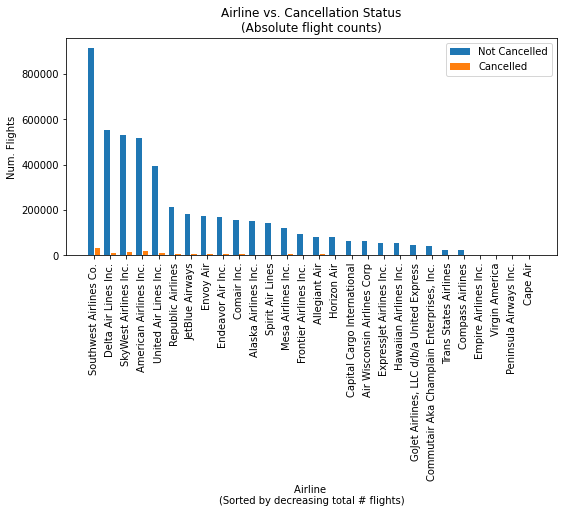

------------------------------------------------------------------------------------------

===> Top 10 based on proportion cancelled flights


Cancelled,Airline,False,True,Total,Prop. Cancelled
0,Peninsula Airways Inc.,352,67,419,0.16
1,Empire Airlines Inc.,3534,225,3759,0.06
2,Allegiant Air,81277,4379,85656,0.05
3,ExpressJet Airlines Inc.,54379,2420,56799,0.04
4,"Commutair Aka Champlain Enterprises, Inc.",43269,1893,45162,0.04
5,Trans States Airlines,23651,1020,24671,0.04
6,Capital Cargo International,63591,2724,66315,0.04
7,Air Wisconsin Airlines Corp,61695,2485,64180,0.04
8,"GoJet Airlines, LLC d/b/a United Express",45094,1761,46855,0.04
9,Mesa Airlines Inc.,121038,4568,125606,0.04



===> Summary statstics of proportion cancelled flights


Cancelled,Prop. Cancelled
count,28.00
mean,0.03
std,0.03
min,0.00
25%,0.02
50%,0.03
75%,0.04
max,0.16


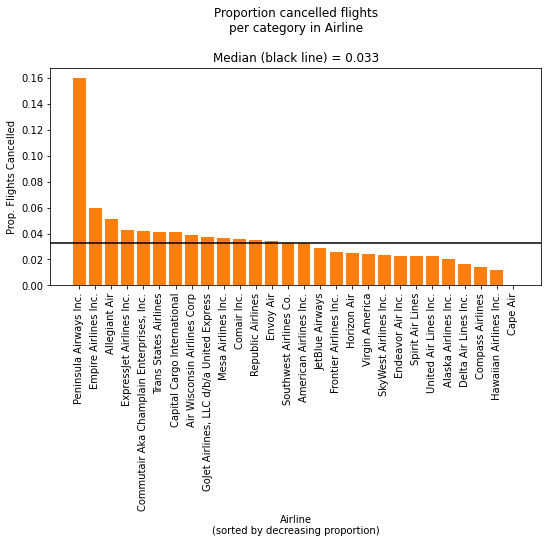




********************************************************************************
OriginStateName
********************************************************************************

===> Top 10 based on total number of flights


Cancelled,OriginStateName,False,True,Total
0,California,515007,12336,527343
1,Texas,505672,16430,522102
2,Florida,395039,11413,406452
3,Illinois,293183,10561,303744
4,Georgia,247118,4544,251662
5,New York,220754,9168,229922
6,Colorado,221056,6498,227554
7,North Carolina,215461,6991,222452
8,Virginia,180022,6406,186428
9,Washington,147805,2962,150767


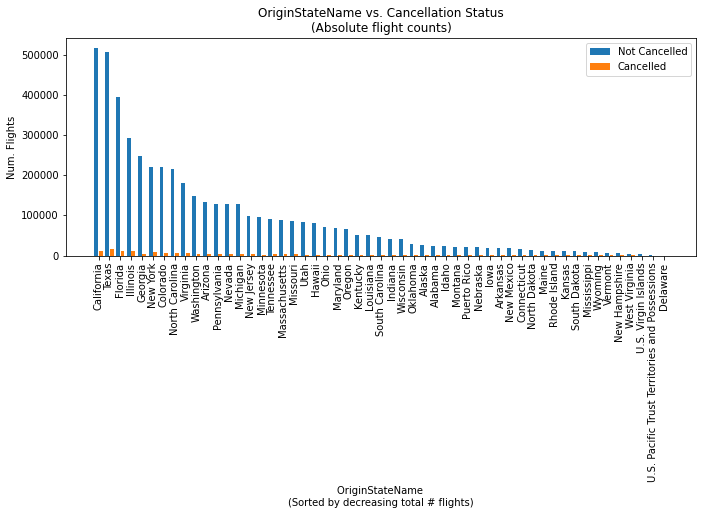

------------------------------------------------------------------------------------------

===> Top 10 based on proportion cancelled flights


Cancelled,OriginStateName,False,True,Total,Prop. Cancelled
0,New Jersey,99357,4627,103984,0.04
1,Maine,12043,557,12600,0.04
2,Rhode Island,11245,486,11731,0.04
3,Vermont,6266,270,6536,0.04
4,New York,220754,9168,229922,0.04
5,North Dakota,13202,515,13717,0.04
6,West Virginia,4921,191,5112,0.04
7,New Hampshire,6109,228,6337,0.04
8,Connecticut,17280,625,17905,0.03
9,Louisiana,50009,1806,51815,0.03



===> Summary statstics of proportion cancelled flights


Cancelled,Prop. Cancelled
count,53.00
mean,0.03
std,0.01
min,0.01
25%,0.02
50%,0.03
75%,0.03
max,0.04


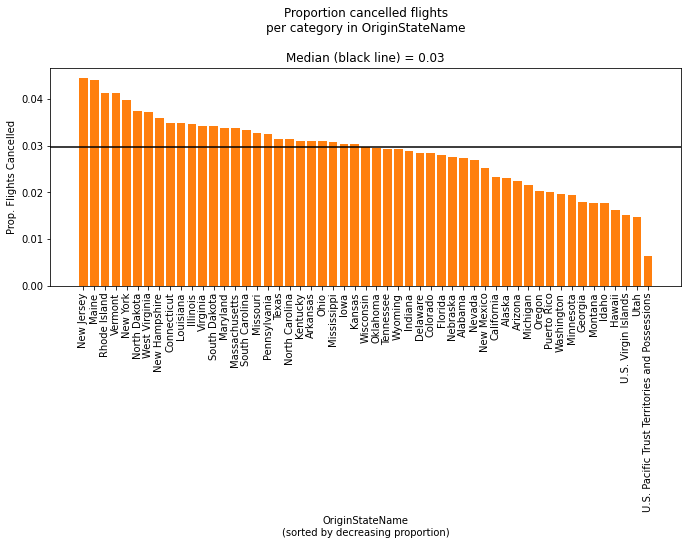




********************************************************************************
OriginCityName
********************************************************************************

===> Top 10 based on total number of flights


Cancelled,OriginCityName,False,True,Total
0,"Chicago, IL",280035,10010,290045
1,"Atlanta, GA",229276,4047,233323
2,"Denver, CO",196214,5414,201628
3,"Dallas/Fort Worth, TX",183139,6608,189747
4,"New York, NY",158666,6467,165133
5,"Houston, TX",154042,4252,158294
6,"Charlotte, NC",150579,4634,155213
7,"Los Angeles, CA",141963,2838,144801
8,"Washington, DC",136954,4817,141771
9,"Seattle, WA",121875,2325,124200


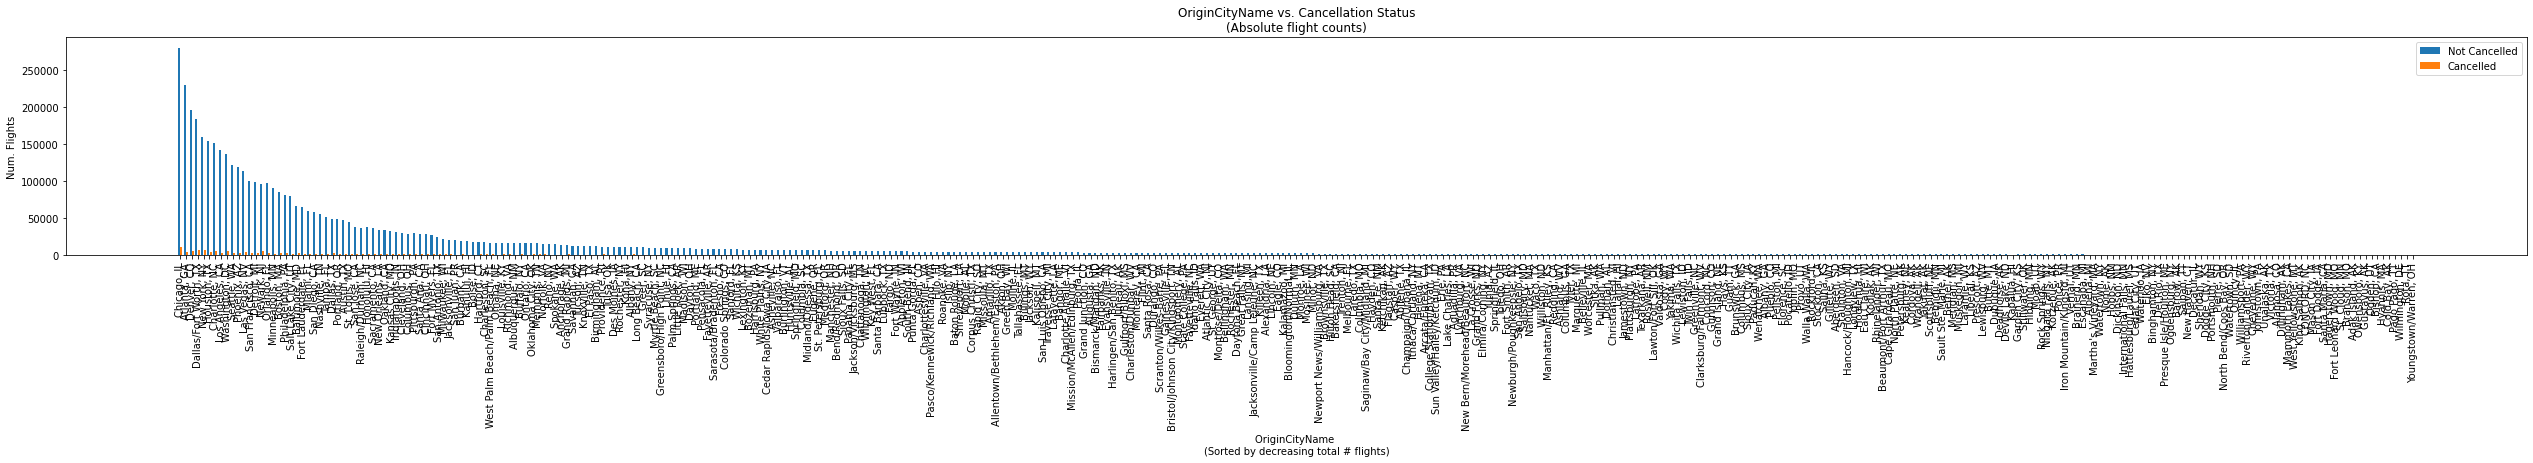

------------------------------------------------------------------------------------------

===> Top 10 based on proportion cancelled flights


Cancelled,OriginCityName,False,True,Total,Prop. Cancelled
0,"Kapalua, HI",396,91,487,0.19
1,"Mammoth Lakes, CA",166,37,203,0.18
2,"Unalaska, AK",175,31,206,0.15
3,"Fort Leonard Wood, MO",91,14,105,0.13
4,"Concord, NC",622,68,690,0.10
5,"Dillingham, AK",187,18,205,0.09
6,"Aspen, CO",4216,393,4609,0.09
7,"Adak Island, AK",77,7,84,0.08
8,"Cold Bay, AK",45,4,49,0.08
9,"Sun Valley/Hailey/Ketchum, ID",1221,108,1329,0.08



===> Summary statstics of proportion cancelled flights


Cancelled,Prop. Cancelled
count,381.00
mean,0.03
std,0.02
min,0.00
25%,0.02
50%,0.03
75%,0.04
max,0.19


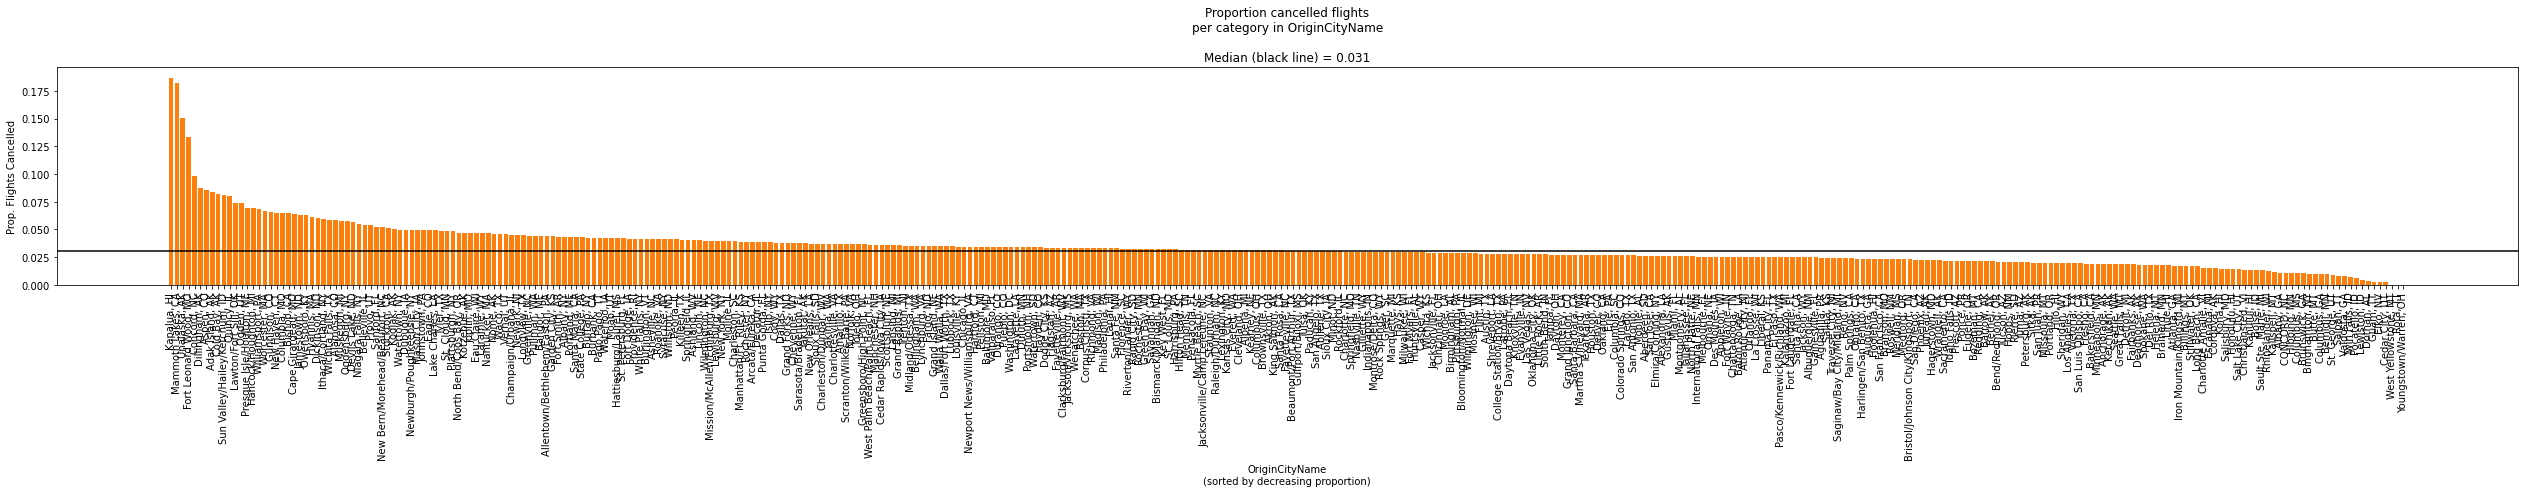




********************************************************************************
DestCityName
********************************************************************************

===> Top 10 based on total number of flights


Cancelled,DestCityName,False,True,Total
0,"Chicago, IL",281235,10476,291711
1,"Atlanta, GA",229741,4091,233832
2,"Denver, CO",195690,5624,201314
3,"Dallas/Fort Worth, TX",182659,6596,189255
4,"New York, NY",159260,6514,165774
5,"Houston, TX",153782,4334,158116
6,"Charlotte, NC",150477,4975,155452
7,"Los Angeles, CA",142115,2932,145047
8,"Washington, DC",136995,4862,141857
9,"Seattle, WA",122297,2400,124697


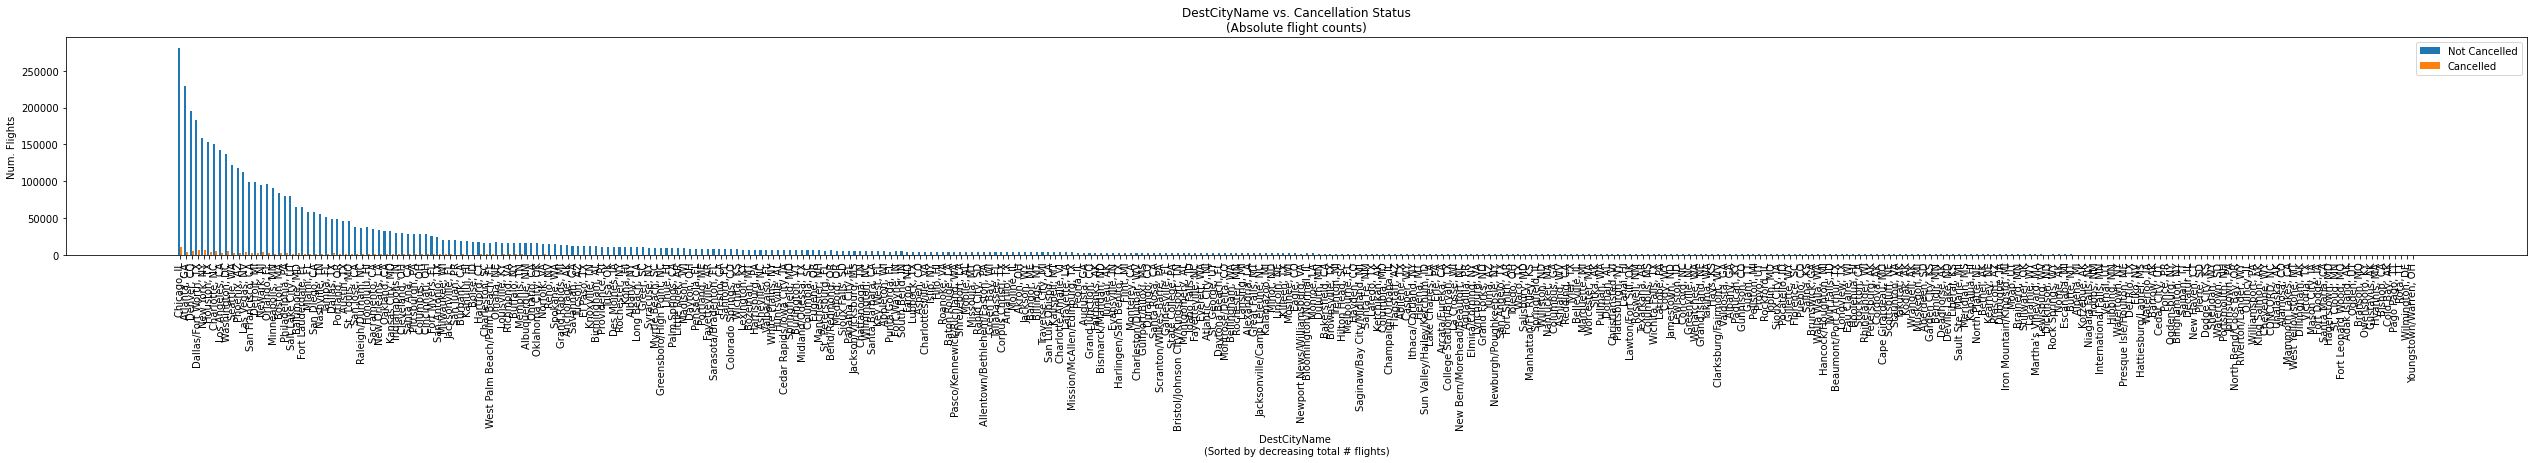

------------------------------------------------------------------------------------------

===> Top 10 based on proportion cancelled flights


Cancelled,DestCityName,False,True,Total,Prop. Cancelled
0,"Mammoth Lakes, CA",164,43,207,0.21
1,"Unalaska, AK",177,36,213,0.17
2,"Kapalua, HI",446,65,511,0.13
3,"Fort Leonard Wood, MO",83,11,94,0.12
4,"Concord, NC",655,63,718,0.09
5,"Presque Isle/Houlton, ME",377,34,411,0.08
6,"Hancock/Houghton, MI",549,49,598,0.08
7,"New Haven, CT",287,24,311,0.08
8,"Ogden, UT",75,6,81,0.07
9,"Mason City, IA",167,13,180,0.07



===> Summary statstics of proportion cancelled flights


Cancelled,Prop. Cancelled
count,381.00
mean,0.03
std,0.02
min,0.00
25%,0.02
50%,0.03
75%,0.04
max,0.21


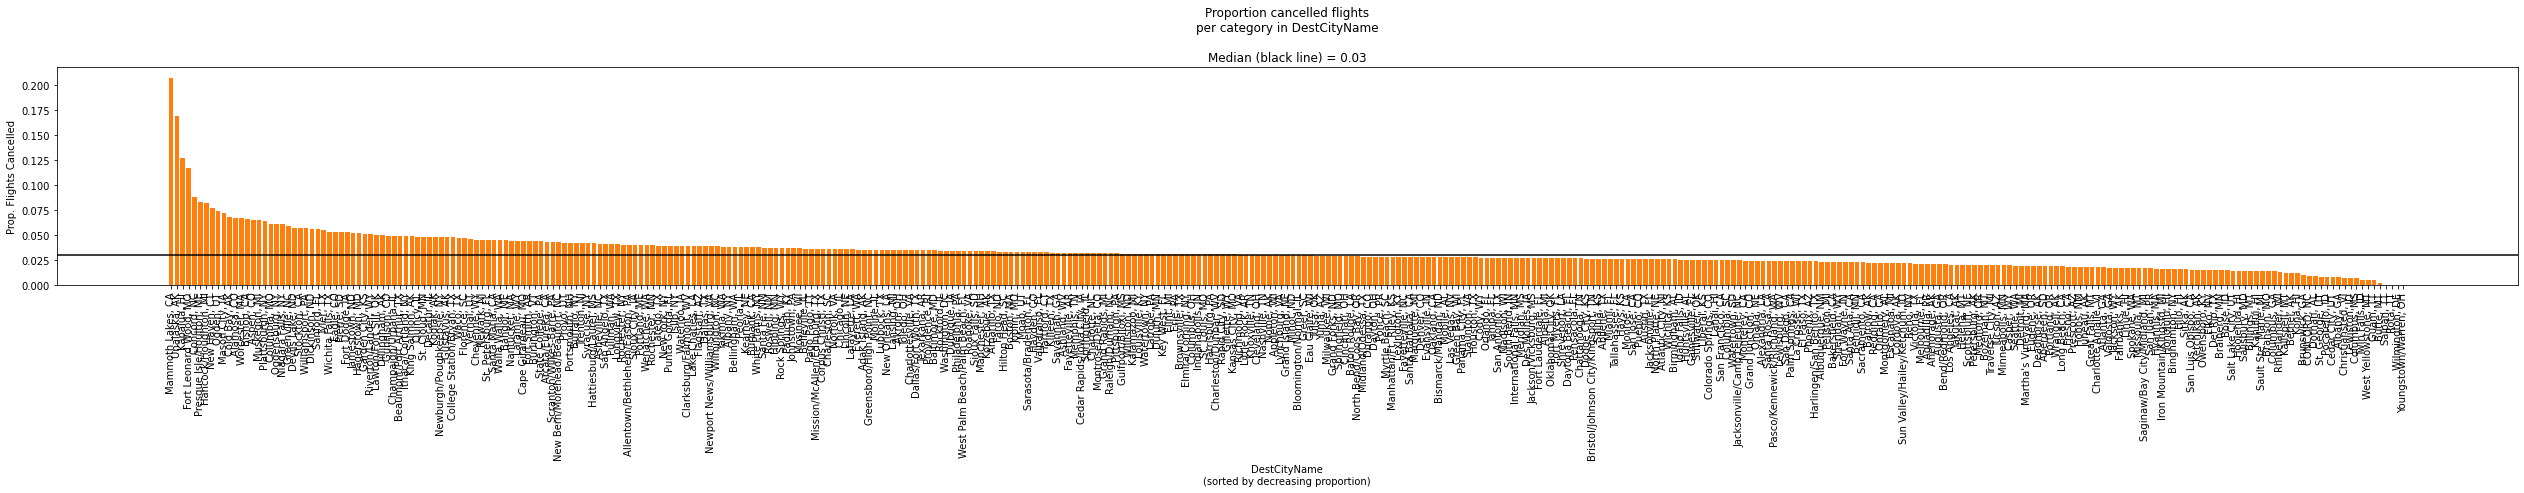




********************************************************************************
DestState
********************************************************************************

===> Top 10 based on total number of flights


Cancelled,DestState,False,True,Total
0,CA,515313,12476,527789
1,TX,505236,16410,521646
2,FL,394863,11479,406342
3,IL,294238,10974,305212
4,GA,247572,4587,252159
5,NY,221429,9152,230581
6,CO,220293,6558,226851
7,NC,215311,7281,222592
8,VA,180114,6353,186467
9,WA,148295,3037,151332


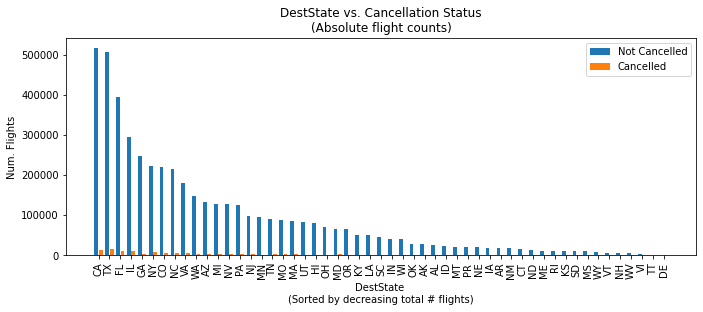

------------------------------------------------------------------------------------------

===> Top 10 based on proportion cancelled flights


Cancelled,DestState,False,True,Total,Prop. Cancelled
0,NJ,98889,4617,103506,0.04
1,VT,6211,284,6495,0.04
2,ME,12158,539,12697,0.04
3,NY,221429,9152,230581,0.04
4,IL,294238,10974,305212,0.04
5,RI,11257,406,11663,0.03
6,MD,66751,2367,69118,0.03
7,VA,180114,6353,186467,0.03
8,NH,6203,218,6421,0.03
9,PA,126354,4434,130788,0.03



===> Summary statstics of proportion cancelled flights


Cancelled,Prop. Cancelled
count,53.00
mean,0.03
std,0.01
min,0.00
25%,0.02
50%,0.03
75%,0.03
max,0.04


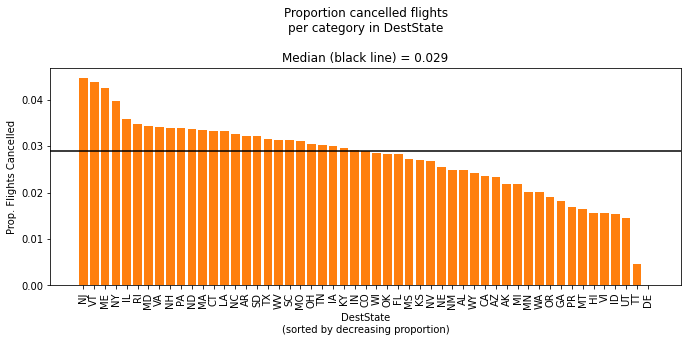




********************************************************************************
Year
********************************************************************************

===> Top 10 based on total number of flights


Cancelled,Year,False,True,Total
0,2018,984255,15745,1000000
1,2019,980880,19120,1000000
2,2020,940133,59867,1000000
3,2021,982416,17584,1000000
4,2022,969858,30142,1000000


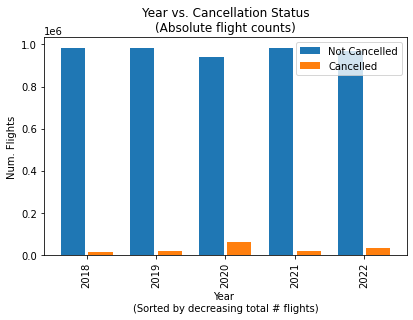

------------------------------------------------------------------------------------------

===> Top 10 based on proportion cancelled flights


Cancelled,Year,False,True,Total,Prop. Cancelled
0,2020,940133,59867,1000000,0.06
1,2022,969858,30142,1000000,0.03
2,2019,980880,19120,1000000,0.02
3,2021,982416,17584,1000000,0.02
4,2018,984255,15745,1000000,0.02



===> Summary statstics of proportion cancelled flights


Cancelled,Prop. Cancelled
count,5.00
mean,0.03
std,0.02
min,0.02
25%,0.02
50%,0.02
75%,0.03
max,0.06


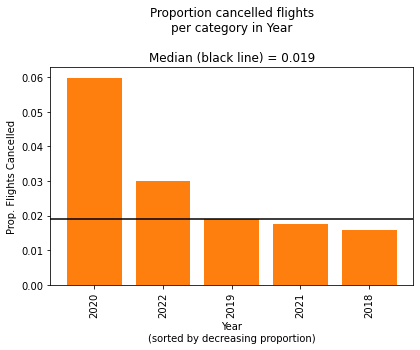




********************************************************************************
Quarter
********************************************************************************

===> Top 10 based on total number of flights


Cancelled,Quarter,False,True,Total
0,1,1360260,58892,1419152
1,2,1241615,50901,1292516
2,3,1162957,20280,1183237
3,4,1092710,12385,1105095


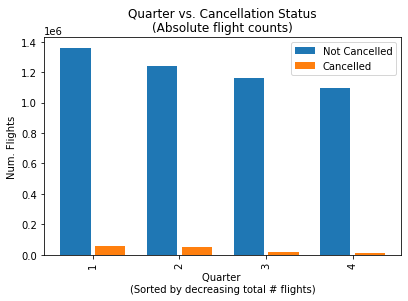

------------------------------------------------------------------------------------------

===> Top 10 based on proportion cancelled flights


Cancelled,Quarter,False,True,Total,Prop. Cancelled
0,1,1360260,58892,1419152,0.04
1,2,1241615,50901,1292516,0.04
2,3,1162957,20280,1183237,0.02
3,4,1092710,12385,1105095,0.01



===> Summary statstics of proportion cancelled flights


Cancelled,Prop. Cancelled
count,4.00
mean,0.03
std,0.02
min,0.01
25%,0.02
50%,0.03
75%,0.04
max,0.04


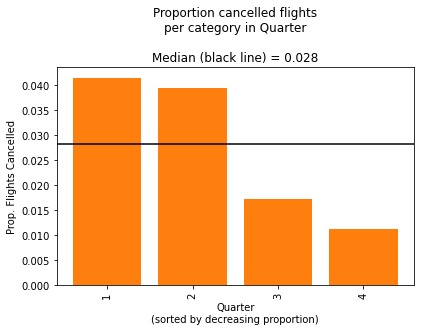




********************************************************************************
Month
********************************************************************************

===> Top 10 based on total number of flights


Cancelled,Month,False,True,Total
0,3,474156,30001,504157
1,1,473214,15584,488798
2,7,468702,7948,476650
3,4,416626,33842,450468
4,6,417703,8778,426481
5,2,412890,13307,426197
6,5,407286,8281,415567
7,10,369155,4117,373272
8,12,364634,5277,369911
9,11,358921,2991,361912


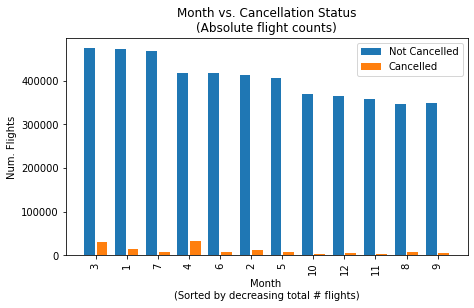

------------------------------------------------------------------------------------------

===> Top 10 based on proportion cancelled flights


Cancelled,Month,False,True,Total,Prop. Cancelled
0,4,416626,33842,450468,0.08
1,3,474156,30001,504157,0.06
2,1,473214,15584,488798,0.03
3,2,412890,13307,426197,0.03
4,8,345992,7545,353537,0.02
5,6,417703,8778,426481,0.02
6,5,407286,8281,415567,0.02
7,7,468702,7948,476650,0.02
8,12,364634,5277,369911,0.01
9,9,348263,4787,353050,0.01



===> Summary statstics of proportion cancelled flights


Cancelled,Prop. Cancelled
count,12.00
mean,0.03
std,0.02
min,0.01
25%,0.01
50%,0.02
75%,0.03
max,0.08


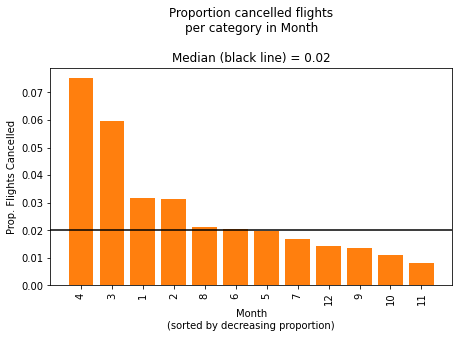




********************************************************************************
DayofMonth
********************************************************************************

===> Top 10 based on total number of flights


Cancelled,DayofMonth,False,True,Total
0,21,162377,4300,166677
1,10,162361,3615,165976
2,17,160936,4982,165918
3,19,162064,3848,165912
4,24,160571,5172,165743
5,23,160999,4741,165740
6,20,161480,4186,165666
7,18,161269,4077,165346
8,12,161839,3393,165232
9,27,159874,5319,165193


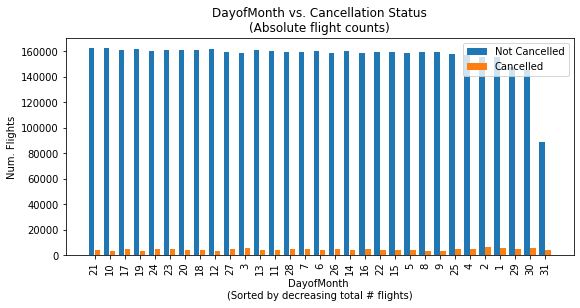

------------------------------------------------------------------------------------------

===> Top 10 based on proportion cancelled flights


Cancelled,DayofMonth,False,True,Total,Prop. Cancelled
0,31,89163,4161,93324,0.04
1,2,155845,6451,162296,0.04
2,3,159066,6081,165147,0.04
3,30,145579,5461,151040,0.04
4,29,147824,5409,153233,0.04
5,1,155979,5453,161432,0.03
6,27,159874,5319,165193,0.03
7,4,157181,5167,162348,0.03
8,26,159029,5192,164221,0.03
9,25,157636,5095,162731,0.03



===> Summary statstics of proportion cancelled flights


Cancelled,Prop. Cancelled
count,31.00
mean,0.03
std,0.01
min,0.02
25%,0.02
50%,0.03
75%,0.03
max,0.04


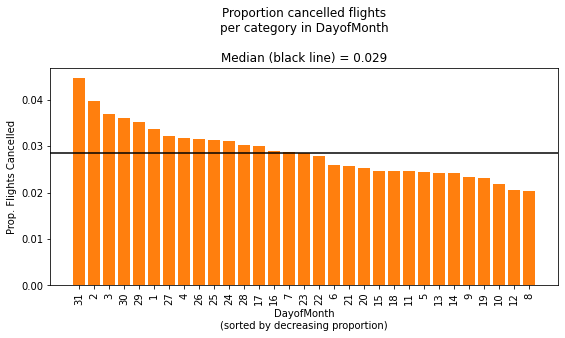




********************************************************************************
DayOfWeek
********************************************************************************

===> Top 10 based on total number of flights


Cancelled,DayOfWeek,False,True,Total
0,1,723996,21467,745463
1,5,723493,21501,744994
2,4,719586,23068,742654
3,7,709320,20966,730286
4,3,685646,19454,705100
5,2,672058,18203,690261
6,6,623443,17799,641242


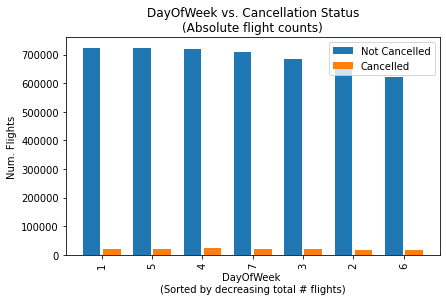

------------------------------------------------------------------------------------------

===> Top 10 based on proportion cancelled flights


Cancelled,DayOfWeek,False,True,Total,Prop. Cancelled
0,4,719586,23068,742654,0.03
1,5,723493,21501,744994,0.03
2,1,723996,21467,745463,0.03
3,7,709320,20966,730286,0.03
4,6,623443,17799,641242,0.03
5,3,685646,19454,705100,0.03
6,2,672058,18203,690261,0.03



===> Summary statstics of proportion cancelled flights


Cancelled,Prop. Cancelled
count,7.00
mean,0.03
std,0.00
min,0.03
25%,0.03
50%,0.03
75%,0.03
max,0.03


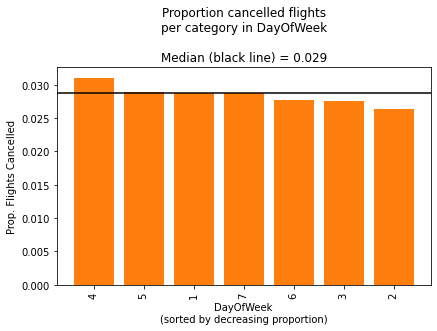




********************************************************************************
Marketing_Airline_Network
********************************************************************************

===> Top 10 based on total number of flights


Cancelled,Marketing_Airline_Network,False,True,Total
0,AA,1153645,40617,1194262
1,UA,972923,30384,1003307
2,DL,982656,17993,1000649
3,WN,914259,31097,945356
4,AS,271612,5701,277313
5,B6,183880,5512,189392
6,NK,142045,3307,145352
7,F9,96076,2529,98605
8,G4,81277,4379,85656
9,HA,56107,864,56971


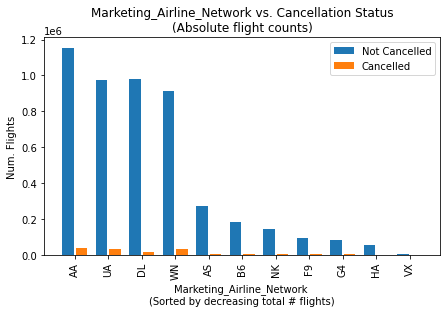

------------------------------------------------------------------------------------------

===> Top 10 based on proportion cancelled flights


Cancelled,Marketing_Airline_Network,False,True,Total,Prop. Cancelled
0,G4,81277,4379,85656,0.05
1,AA,1153645,40617,1194262,0.03
2,WN,914259,31097,945356,0.03
3,UA,972923,30384,1003307,0.03
4,B6,183880,5512,189392,0.03
5,F9,96076,2529,98605,0.03
6,VX,3062,75,3137,0.02
7,NK,142045,3307,145352,0.02
8,AS,271612,5701,277313,0.02
9,DL,982656,17993,1000649,0.02



===> Summary statstics of proportion cancelled flights


Cancelled,Prop. Cancelled
count,11.00
mean,0.03
std,0.01
min,0.02
25%,0.02
50%,0.03
75%,0.03
max,0.05


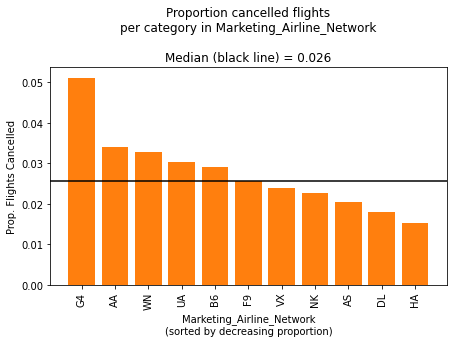

In [160]:
for cat in categories:
    
    print("\n\n\n" + "*" * 80)
    print(cat)
    print("*" * 80)
    
    # make sure column is a string
    # some categorical variables, like year or day of week, are entered as numbers, but are continuous variables
    merged[cat] = merged[cat].astype("str")
    
    # obtain absolute counts of cancelled (True) and not cancelled (False) flights across categories within variable
    # sort by high to low total flights within categories
    counts = pd.crosstab(merged[cat], merged["Cancelled"]).reset_index()
    counts["Total"] = counts[True] + counts[False]
    counts = counts.sort_values("Total", ascending = False)
    print("\n===> Top 10 based on total number of flights")
    display(counts.head(10).reset_index(drop = True))
    
    # plot absolute counts as a grouped barplot
    width_of_bar = 0.35
    x = np.arange(counts.shape[0])
    plt.figure(figsize = (6 + (0.1 * counts.shape[0]), 4))
    plt.bar(x-0.2, counts[False], width_of_bar)
    plt.bar(x+0.2, counts[True], width_of_bar)
    plt.xticks(x, counts[cat])
    plt.ylabel("Num. Flights")
    plt.legend(["Not Cancelled", "Cancelled"])
    plt.title(cat + " vs. Cancellation Status\n(Absolute flight counts)")
    plt.xlabel(cat + " \n(Sorted by decreasing total # flights)")
    plt.xticks(rotation = 90)
    plt.show()
    print("-" * 90)
    
    # calculate proportion of cancelled flights within categories of variable
    # sort by decreasing proportion
    counts["Prop. Cancelled"] = counts[True] / counts["Total"]
    counts = counts.sort_values("Prop. Cancelled", ascending = False)
    med = counts["Prop. Cancelled"].median()
    print("\n===> Top 10 based on proportion cancelled flights")
    display(counts.head(10).reset_index(drop = True))
    print("\n===> Summary statstics of proportion cancelled flights")
    display(counts[["Prop. Cancelled"]].describe())
    
    # plot proportion flights cancelled
    plt.figure(figsize = (6 + (0.1 * counts.shape[0]), 4))
    plt.bar(x = counts[cat], height = counts["Prop. Cancelled"], color ="#ff7f0e")
    plt.ylabel("Prop. Flights Cancelled")
    plt.title("Proportion cancelled flights\nper category in " + cat + "\n\nMedian (black line) = " + str(round(med,3)))
    plt.axhline(med, c = "black")
    plt.xlabel(cat + "\n(sorted by decreasing proportion)")
    plt.xticks(rotation = 90)
    plt.show()

## 3.2) Explore relationship between flight cancellation status and continous variables

In this section, I seek to explore the relationship between continous variables (ie. distance) and whether or not a flight is cancelled. I will use two types of visualzations. (1) Histograms to visualize the distribution of values for cancelled and not cancelled flights, and (2) Boxplots to visualize the distribution and summary statistics between cancelled and not.

| Categorical Variable | Description | Notes |
| -------------------- | ----------- | ------|
| CRSDepTime | Scheduled departure time (local time, hhmm, 24h clock) | |
| DepDelay | Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.| | 
| DepDelayMinutes | Difference in minutes between scheduled and actual departure time. Early departures set to 0. |  |
| TaxiOut | Taxi Out Time, in Minutes | | 
| Distance | Distance between origin and destinaton ariports in miles | |

I noticed a lot of extreme outliers that make distrubution hard to interpret - further data cleaning is required and perhaps removing these outliers would improve interpretability of variables

In [249]:
# Define continuous variables (columns) of interest
continuous = ["DepTime", 
              "DepDelay", 
              "DepDelayMinutes", 
              "TaxiOut",
              "Distance"      
             ]

In [250]:
print("====> Summary statistics across continuous values of interest, split by cancelled (True) or not cancelled (False)....\n")
display(merged[["Cancelled"] + continuous].groupby('Cancelled').describe().T)

====> Summary statistics across continuous values of interest, split by cancelled (True) or not cancelled (False)....



Cancelled                  False     True 
DepTime         count 4857538.00   2634.00
                mean     1328.78   1492.65
                std       494.36    502.32
                min         1.00      1.00
                25%       920.00   1129.00
                50%      1323.00   1541.00
                75%      1735.00   1902.00
                max      2400.00   2400.00
DepDelay        count 4857381.00   2578.00
                mean        9.18     59.17
                std        47.05    116.63
                min      -339.00    -23.00
                25%        -6.00     -3.00
                50%        -3.00     15.00
                75%         5.00     83.75
                max      7223.00   1479.00
DepDelayMinutes count 4857381.00   2578.00
                mean       12.67     61.05
                std        45.94    115.59
                min         0.00      0.00
                25%         0.00      0.00
                50%         0.00     15.00
                75%         5.00     83.75
                max      7223.00   1479.00
TaxiOut         count 4856316.00    651.00
                mean       16.63     21.63
                std         9.32     14.99
                min         0.00      2.00
                25%        11.00     13.00
                50%        14.00     17.00
                75%        19.00     24.50
                max       221.00    120.00
Distance        count 4857542.00 142458.00
                mean      782.85    711.92
                std       582.76    516.71
                min        16.00     16.00
                25%       356.00    327.00
                50%       628.00    590.00
                75%      1020.00    955.00
                max      5812.00   5095.00




********************************************************************************
DepTime
********************************************************************************


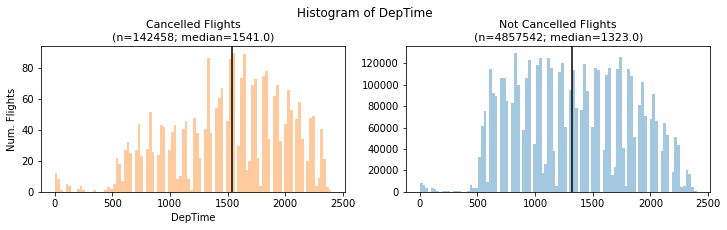

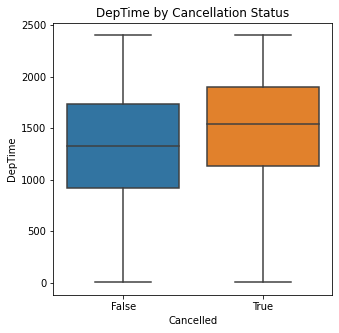




********************************************************************************
DepDelay
********************************************************************************


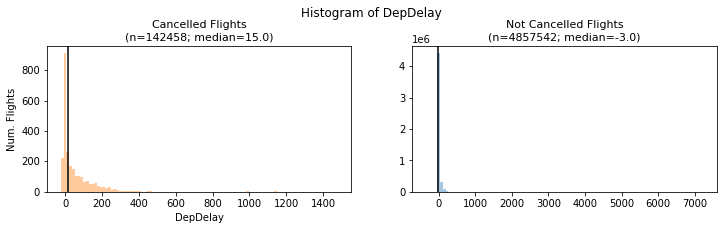

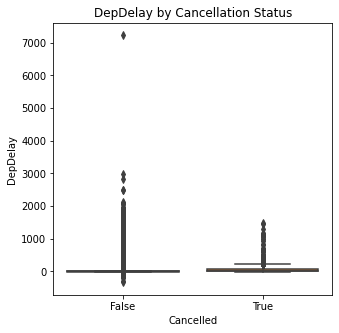




********************************************************************************
DepDelayMinutes
********************************************************************************


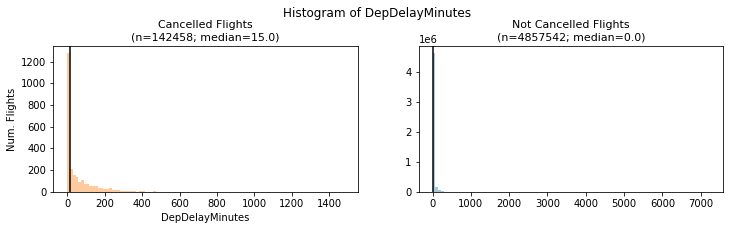

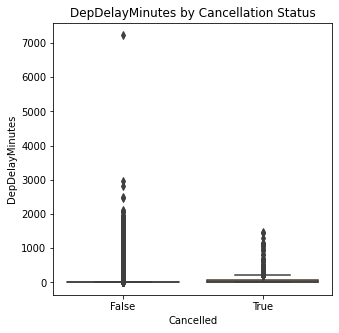




********************************************************************************
TaxiOut
********************************************************************************


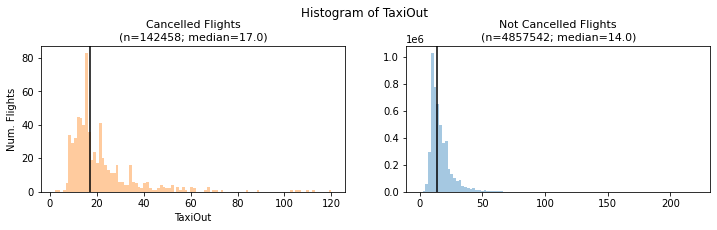

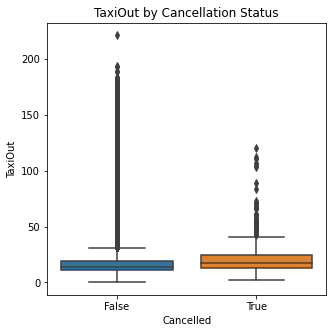




********************************************************************************
Distance
********************************************************************************


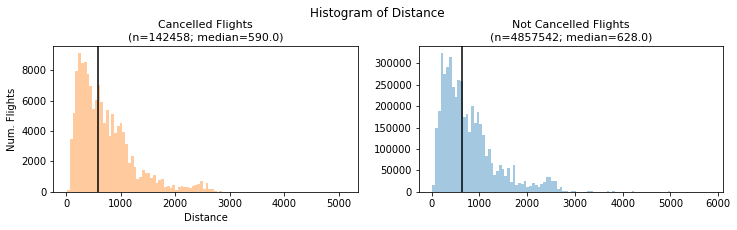

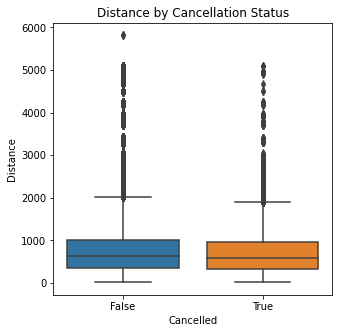

In [251]:
for cont in continuous:
    
    print("\n\n\n" + "*" * 80)
    print(cont)
    print("*" * 80)
    
    # plot histogram of continuous value distributions in cancelled and not cancelled flights
    fig,(ax1, ax2) = plt.subplots(1, 2, figsize = [12,3])
    fig.suptitle('Histogram of ' + cont)
    fig.subplots_adjust(top=0.8)
    ax1.hist(merged[merged["Cancelled"] == True][cont], bins = 100, alpha = 0.4, color = "#ff7f0e")
    ax1.set_title('Cancelled Flights\n(n=' + str(merged[merged["Cancelled"] == True].shape[0]) + "; median=" + 
                  str(round(merged[merged["Cancelled"] == True][cont].median(), 3)) + ")", fontsize = 11)
    ax1.axvline(merged[merged["Cancelled"] == True][cont].median(), color = "black")
    ax1.set_ylabel("Num. Flights")
    ax1.set_xlabel(cont)
    ax2.hist(merged[merged["Cancelled"] == False][cont], bins = 100, alpha = 0.4, color = "#1f77b4")
    ax2.set_title('Not Cancelled Flights\n(n=' + str(merged[merged["Cancelled"] == False].shape[0]) + "; median=" + 
                  str(round(merged[merged["Cancelled"] == False][cont].median(), 3)) + ")", fontsize = 11)
    ax2.axvline(merged[merged["Cancelled"] == False][cont].median(), color = "black")
    ax1.set_ylabel("Num. Flights")
    ax1.set_xlabel(cont)
    plt.show()
    
    # visualize distribution differences (if any) between cancelled and non-cancelled flights using a boxplot
    plt.figure(figsize=(5,5))
    sns.boxplot(data=merged, x="Cancelled", y=cont)
    plt.title(cont + " by Cancellation Status")
    plt.show()

In [253]:
# take a look at the column headers
merged.columns.to_list()

['FlightDate',
 'Airline',
 'Origin',
 'Dest',
 'Cancelled',
 'Diverted',
 'CRSDepTime',
 'DepTime',
 'DepDelayMinutes',
 'DepDelay',
 'ArrTime',
 'ArrDelayMinutes',
 'AirTime',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'Distance',
 'Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'Marketing_Airline_Network',
 'Operated_or_Branded_Code_Share_Partners',
 'DOT_ID_Marketing_Airline',
 'IATA_Code_Marketing_Airline',
 'Flight_Number_Marketing_Airline',
 'Operating_Airline',
 'DOT_ID_Operating_Airline',
 'IATA_Code_Operating_Airline',
 'Tail_Number',
 'Flight_Number_Operating_Airline',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRS